<Axes: >

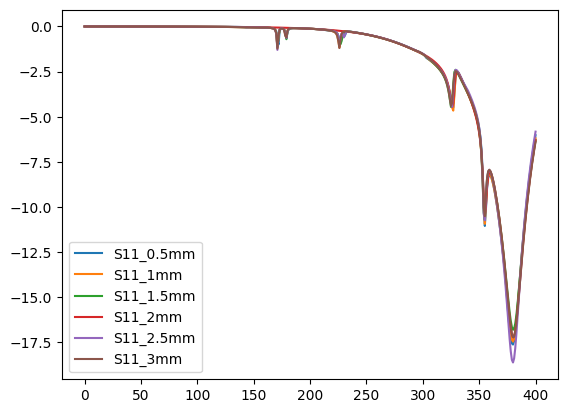

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/dataset-diff-sizes/s11_db_rad_14_tumor_diff_sizes.csv')
df = df.drop(['Freq [GHz]'], axis=1)
df = df.drop(['Phase_0.5mm'], axis=1)
df = df.drop(['Phase_1mm'], axis=1)
df = df.drop(['Phase_1.5mm'], axis=1)
df = df.drop(['Phase_2mm'], axis=1)
df = df.drop(['Phase_2.5mm'], axis=1)
df = df.drop(['Phase_3mm'], axis=1)
df.head()
df.plot()

['Diagnosis', 'Freq', 'S11 (dB)', 'Phase']
List of possible accuracy: [0.48129675810473815]


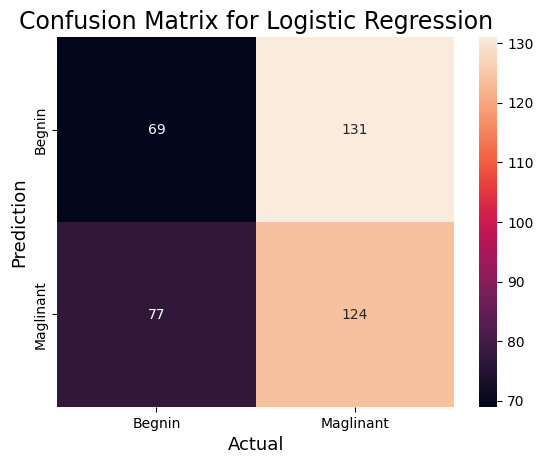

Accuracy   : 0.48129675810473815
Precision : 0.48627450980392156
Recall    : 0.6169154228855721
F1-score  : 0.543859649122807


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("/kaggle/input/tumor-detection-tumor-diff-sizes/dataset_diff_sizes.csv")
df.head()

df.columns

l = list(df.columns)
print(l)

# To check what value does the Diagnosis field have
df['Diagnosis'].unique()
# B stands for there is a begnin tumor, M stands for maglinant tumor
df['Diagnosis'].value_counts()


df.shape
df.describe()


X = df.drop(['Diagnosis'], axis=1)

X.head()

y = df['Diagnosis']
y.head()

# divide the dataset into train and test set
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import datasets

# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)


# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

# apply Logistic Regression
 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_fold, y_train_fold)
 
# implemented our model through logistic regression
y_pred = lr.predict(x_test_fold)
y_pred

lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
print('List of possible accuracy:', lst_accu_stratified)

cm = confusion_matrix(y_test_fold,y_pred)

#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Begnin', 'Maglinant'],
            yticklabels=['Begnin', 'Maglinant'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for Logistic Regression',fontsize=17)
plt.show()

# Finding precision and recall
accuracy_lr = accuracy_score(y_test_fold, y_pred)
print("Accuracy   :", accuracy_lr)
precision = precision_score(y_test_fold, y_pred)
print("Precision :", precision)
recall = recall_score(y_test_fold, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test_fold, y_pred)
print("F1-score  :", F1_score)



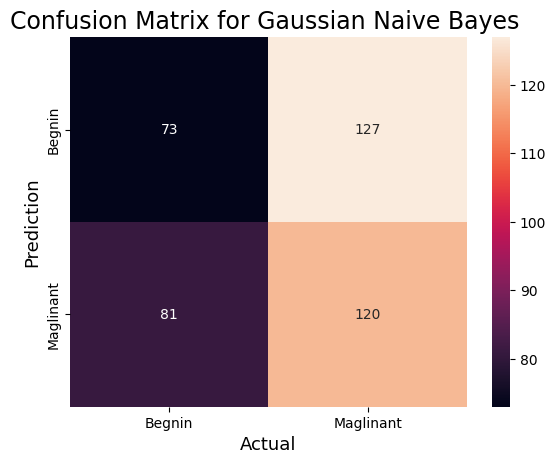

Accuracy   : 0.48129675810473815
Precision : 0.48582995951417
Recall    : 0.5970149253731343
F1-score  : 0.5357142857142857


In [3]:
#apply Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_fold, y_train_fold)
  
# making predictions on the testing set
y_pred = gnb.predict(x_test_fold)
  
cm = confusion_matrix(y_test_fold,y_pred)

#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Begnin', 'Maglinant'],
            yticklabels=['Begnin', 'Maglinant'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for Gaussian Naive Bayes ',fontsize=17)
plt.show()

# Finding precision and recall
accuracy_gnb = accuracy_score(y_test_fold, y_pred)
print("Accuracy   :", accuracy_gnb)
precision = precision_score(y_test_fold, y_pred)
print("Precision :", precision)
recall = recall_score(y_test_fold, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test_fold, y_pred)
print("F1-score  :", F1_score)

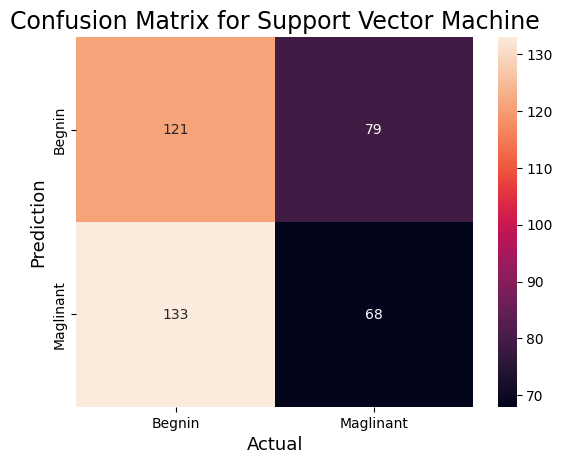

Accuracy   : 0.4713216957605985
Precision : 0.46258503401360546
Recall    : 0.3383084577114428
F1-score  : 0.3908045977011494


In [4]:
# apply Support Vector Machine
from sklearn import svm
svc = svm.SVC()
svc.fit(x_train_fold, y_train_fold)
         
y_pred = svc.predict(x_test_fold)
y_pred
 
cm = confusion_matrix(y_test_fold,y_pred)

#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Begnin', 'Maglinant'],
            yticklabels=['Begnin', 'Maglinant'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for Support Vector Machine',fontsize=17)
plt.show()

# Finding precision and recall
accuracy_svm = accuracy_score(y_test_fold, y_pred)
print("Accuracy   :", accuracy_svm)
precision = precision_score(y_test_fold, y_pred)
print("Precision :", precision)
recall = recall_score(y_test_fold, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test_fold, y_pred)
print("F1-score  :", F1_score)

In [5]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression Method'], 'Accuracy':[accuracy_lr*100]})
results = pd.concat( [tempResults] )
tempResults = pd.DataFrame({'Algorithm':['Guassian Naive Byers'], 'Accuracy':[accuracy_gnb*100]})
results = pd.concat( [results, tempResults] )
tempResults = pd.DataFrame({'Algorithm':['Support Vector Machine'], 'Accuracy':[accuracy_svm*100]})
results = pd.concat( [results, tempResults] )
results

,Algorithm,Accuracy
0,Logistic Regression Method,48.129676
0,Guassian Naive Byers,48.129676
0,Support Vector Machine,47.132170
